# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
reg = smf.ols('tip_pct ~ net_bill', data= tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.52e-06
Time:                        17:27:48   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 0.7481522425773848)

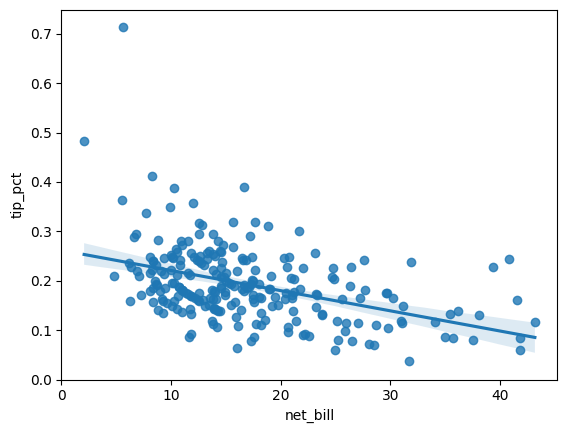

In [4]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.72])
plt.xlim(left = 0)
plt.ylim(bottom = 0)

Text(0, 0.5, 'resíduo')

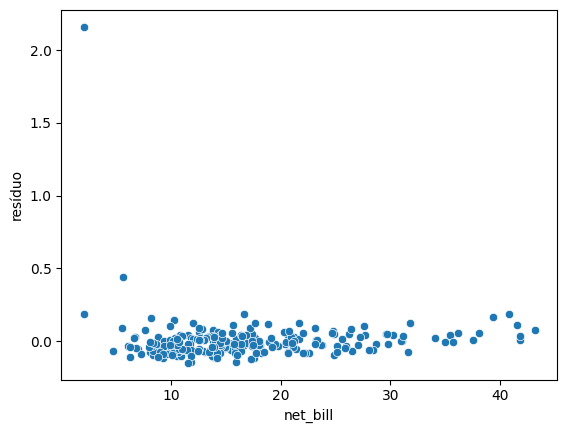

In [5]:
#Gráfico do resíduo
sns.scatterplot(x= tips['net_bill'], y = reg.resid, data=tips)
plt.xlabel('net_bill')
plt.ylabel('resíduo')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [6]:
reg_2 = smf.ols('tip_pct ~ np.log(net_bill)', data= tips).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.62e-13
Time:                        17:27:59   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054     11.444      0.000       0.512       0.724
np.log(net_bill)    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'resíduo')

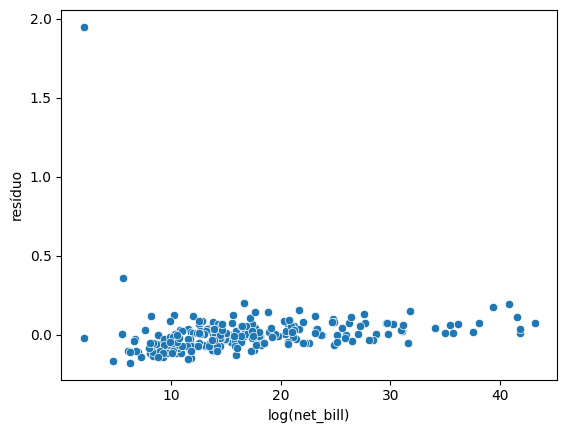

In [7]:
#Gráfico do resíduo
sns.scatterplot(x= tips['net_bill'], y = reg_2.resid, data=tips)
plt.xlabel('log(net_bill)')
plt.ylabel('resíduo')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [8]:
reg_3 = smf.ols('tip_pct ~ np.power(net_bill,2)', data= tips).fit()
reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.48
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           0.000297
Time:                        17:28:07   Log-Likelihood:                 102.94
No. Observations:                 244   AIC:                            -201.9
Df Residuals:                     242   BIC:                            -194.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2388      0.014     16.725      0.000       0.211       0.267
np.power(net_bill, 2)    -0.0001   2.89e-05     -3.672      0.000      -0.000   -4.91e-05
==============================================================================
Omnibus:                      471.934   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           242314.902
Skew:                          11.261   Prob(JB):                         0.00
Kurtosis:                     155.732   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'resíduo')

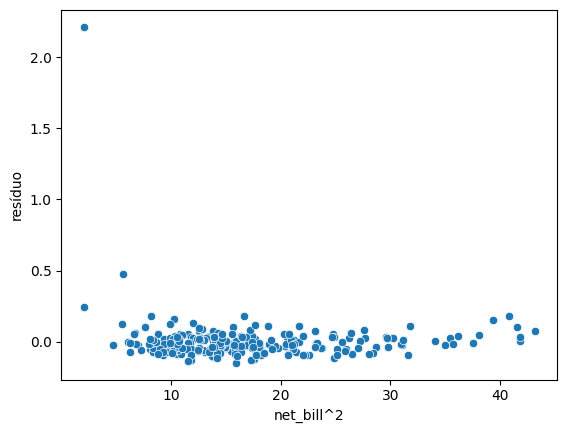

In [9]:
#Gráfico do resíduo
sns.scatterplot(x= tips['net_bill'], y = reg_3.resid, data=tips)
plt.xlabel('net_bill^2')
plt.ylabel('resíduo')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [10]:
reg_4 = smf.ols('np.log(tip_pct) ~ net_bill', data= tips).fit()
reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           8.27e-16
Time:                        17:28:13   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.000      -1.385      -1.165
net_bill      -0.0259      0.003     -8.630      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.929   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.392
Skew:                           0.664   Prob(JB):                     7.78e-57
Kurtosis:                       7.864   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'resíduo')

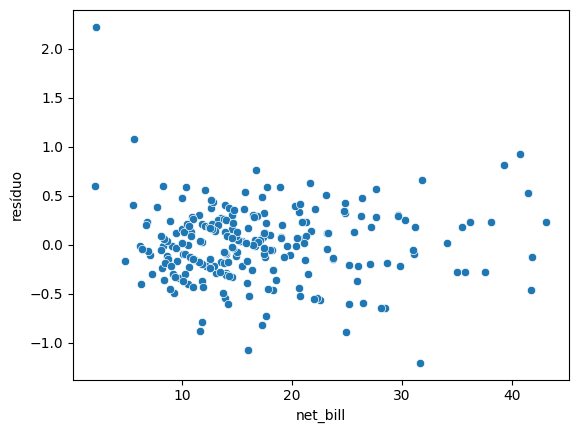

In [11]:
#Gráfico do resíduo
sns.scatterplot(x= tips['net_bill'], y = reg_4.resid, data=tips)
plt.xlabel('net_bill')
plt.ylabel('resíduo')

In [13]:
tips['pred_y_reg_4'] = np.exp(reg_4.fittedvalues)
tips[['pred_y_reg_4', 'tip_pct']].corr().iloc[0,1]**2

0.1144098859252977

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [14]:
reg_5 = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data= tips).fit()
reg_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           5.20e-20
Time:                        17:28:49   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)    -0.4849      0.048    -10.026      0.000      -0.580      -0.390
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
tips['pred_y_reg_5'] = np.exp(reg_5.fittedvalues)
tips[['pred_y_reg_5', 'tip_pct']].corr().iloc[0,1]**2

0.30894874740322276

Text(0, 0.5, 'resíduo')

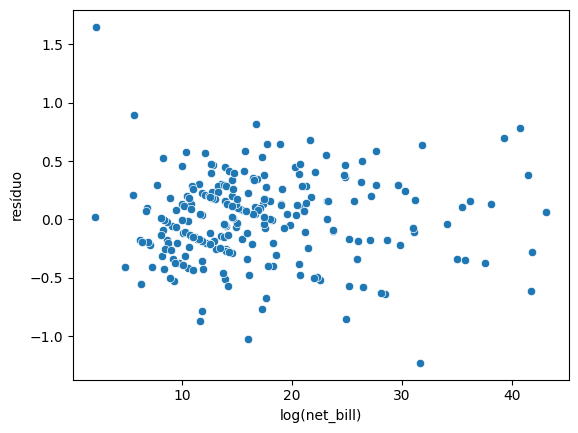

In [16]:
#Gráfico do resíduo
sns.scatterplot(x= tips['net_bill'], y = reg_5.resid, data=tips)
plt.xlabel('log(net_bill)')
plt.ylabel('resíduo')

###  6. qual modelo resultou no melhor ajuste?

De todos os modelos, o reg_5, aquele onde ambos 'tip_pct' e 'net_bill' foram feitos em escala logarítmica foi o melhor. Podemos afirmar isso não só pelo fato de que o r-quadrado deste modelo foi o maior de todos, mas também o r-quadrado dos valores preditos por esse modelo com os valores reais de 'tip_pct' também foi o alto, além disso, este modelo é o que possui o resíduo mais bem distribuído, sem quase nenhuma linha de tendência entre os valores.